In [474]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats 
%matplotlib inline

In [475]:
def sigmoid(z):
    return 1./(1+np.exp(-z))

In [476]:
def log_loss(t, y):
    return np.sum((-t*np.log(y) - (1 - t) * (np.log(1 - y))), keepdims=True).flatten()

def diff_log_loss(t, y):
    return np.sum(-t/y +(1-t)/(1-y), keepdims=True)

In [477]:
class Layer: #слой реализован в виде класса
  
    
    def __init__(self, n_inp, n_out, lr=0.1):
        self.shape = (n_inp, n_out) #залетают входящие и выходящие значения
        self.lr = lr #шаг обучения
        self.w = np.zeros(self.shape, dtype=np.float32) #веса в начале заданы нулями
        self.b = np.zeros((1, n_out), dtype=np.float32) #смещения в начале заданы нулями
        self._clear_grads() #проход обычного градиентного спуска

    def _clear_grads(self): #градиентный спуск
        self.inp = None
        self.activations = None
        self.d_sigma = None
        self.d_w = None
        self.d_b = None

    def __call__(self, x): #вызов класса
        if len(x.shape) == 1: #если входящие значения одноразмерны - сменить размерность
            x = x.reshape(1, -1)
        self.inp = x #задаем входные значения
        self.activations = sigmoid(x.astype(np.float64).dot(self.w) + self.b) #запуск функции с функцией активации
        return self.activations

    def backward(self, grad): # обратный проход
        self.d_sigma = self.activations * (1 - self.activations) #производная функции ошибки 
        self.d_w = self.grad_w(grad)
        self.d_b = self.grad_b(grad)
        return self.grad_x(grad)

    def grad_w(self, grad):
        return grad * self.inp.T * self.d_sigma

    def grad_b(self, grad):
        return grad * self.d_sigma

    def grad_x(self, grad):
        return self.w.dot(grad) * self.d_sigma

    def step(self):
        self.w -= self.d_w * self.lr
        self.b -= self.d_b * self.lr
        self._clear_grads()
        #return(self.w, self.b)
    
    def logos(self,sample):
        return(sigmoid(sample.dot(self.w) + self.b))

In [478]:
l1 = Layer(1, 1)
l1.shape

(1, 1)

In [479]:
mu_0 = np.random.normal(1.0, 1.0, (2,10000))
mu_1 = np.random.normal(-1.0, 1.0, (2,10000))

In [480]:
#x = np.array([1., 2., 1., -1., -2.])

In [481]:
mu_0

array([[ 0.55118529,  1.972101  , -1.00655231, ...,  2.61637508,
         1.96246741,  2.02521176],
       [ 0.30325076,  0.26552303,  0.41834414, ...,  1.45817106,
        -1.18657685,  0.26578895]])

In [482]:
mu_1 

array([[-0.67202344, -1.90619386, -2.26480142, ..., -1.11867706,
        -3.12955575, -0.04357361],
       [-0.93426927, -0.47977369, -2.29984184, ..., -0.9643329 ,
        -1.86213066, -1.01928987]])

In [483]:
print(mu_1[[1],[0]])
print(mu_1[[0],[0]])

[-0.93426927]
[-0.67202344]


In [484]:
t = 1

In [485]:
x = (mu_0[[0],[0]])

In [486]:
x = np.array(x)

In [487]:
x.shape

(1,)

In [488]:
for i in range(50):
    x = (mu_0[[0],[i]])
    x = np.array(x)
    y = l1(x)
    d_y = diff_log_loss(t, y)
        #print(d_y)
    l1.backward(d_y)
    l1.step()
print(d_y)

[[-1.00491541]]


In [489]:
y

array([[0.99510863]])

In [490]:
t2 = 0

In [491]:
for i in range(50):
    x = (mu_1[[0],[i]])
    x = np.array(x)
    y = l1(x)
    d_y = diff_log_loss(t2, y)
        #print(d_y)
    l1.backward(d_y)
    l1.step()
print(d_y)

[[1.04052656]]


In [492]:
y

array([[0.03894812]])

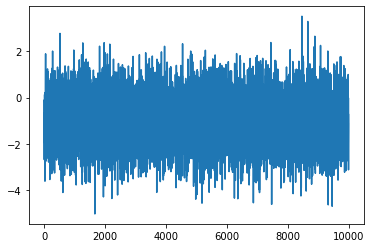

In [493]:
plt.plot(mu_1[0], label='d0')

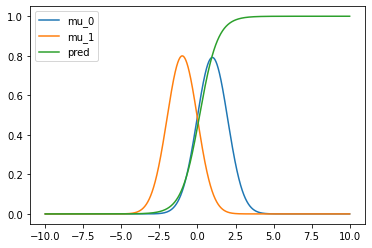

In [494]:
x_scale = np.linspace(-10, 10, 5000)
predictor = []
for line in x_scale:
    x = np.array(line)
    predictor.append(l1(x))
predictor = np.array(predictor)
predictor.reshape(5000,1)
h = mu_0[1]
h.sort()
hmean = np.mean(h) 
hstd = np.std(h) 
mu0_pdf = stats.norm.pdf(x_scale, hmean, hstd)
plt.plot(x_scale, mu0_pdf*2, label='mu_0')
h = mu_1[1]
h.sort()
hmean = np.mean(h) 
hstd = np.std(h) 
mu1_pdf = stats.norm.pdf(x_scale, hmean, hstd) 
plt.plot(x_scale,  mu1_pdf*2, label='mu_1')
plt.plot(x_scale, predictor.flatten() , label='pred')
plt.legend()

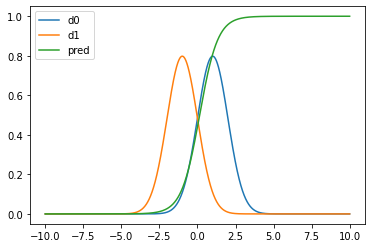

In [495]:
mu0, sigma0 = 1., 1.
mu1, sigma1 = -1., 1.
x_scale = np.linspace(-10, 10, 5000) # сетка от -10 до 10, тк одномерная функция
d0_pdf = stats.norm.pdf(x_scale, mu0, sigma0) # делаем фукнцию нормального распределения по сетке x со значениями мю и сигма
d1_pdf = stats.norm.pdf(x_scale, mu1, sigma1)
plt.plot(x_scale, d0_pdf*2, label='d0') # умножение на 2 для красоты графиков, на распределения не влияет
plt.plot(x_scale, d1_pdf*2, label='d1')
plt.plot(x_scale, predictor.flatten() , label='pred')
plt.legend()